In [4]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = "/mnt/vast-nfs/x2ct/CT-RATE/dataset/train/train_1/train_1_a/train_1_a_2.nii.gz"
image = sitk.ReadImage(path)

In [6]:
# Show slices of the image
for i in range(0, image.GetSize()[2]):
    slice = image[:,:,i]
    sitk.Show(slice)
    print("Slice: ", i)

RuntimeError: Exception thrown in SimpleITK Show: /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

In [ ]:
for i in range(0, image.GetSize()[2]):
    slice = image[:,:,i]
    sitk.Show(slice)
    print("Slice: ", i)

(512, 512, 303)


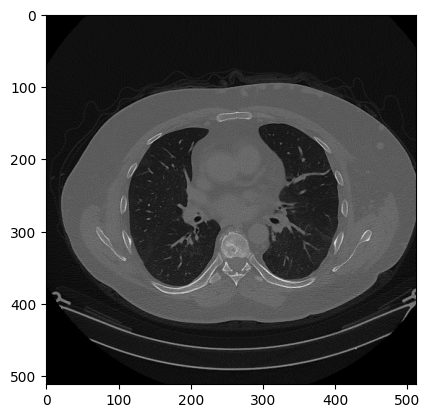

In [ ]:
slice_id = image.GetSize()[2] // 2
slice = image[:,:, slice_id]
print(image.GetSize())
plt.imshow(sitk.GetArrayFromImage(slice).clip(7000, 10000), cmap='gray')

In [1]:
import pandas as pd
from pathlib import Path

In [77]:
name = "2025-03-07T14-47-49_x2ct-ct-sv3d-diffusion-ct-cached-128-transformer"

In [78]:
csv = pd.read_csv(f"/raid/maximilian.schulze/generative-models/logs/{name}/testtube/version_0/metrics.csv")

In [79]:
for epoch, tab in csv.groupby("epoch"):
    print(epoch, tab["loss"].mean())

0.0 2.248046875
1.0 2.376953125
2.0 2.859375
3.0 2.0703125
4.0 2.7421875
5.0 2.234375
6.0 2.46875
7.0 2.17578125
8.0 2.5859375
9.0 1.955078125
10.0 2.197265625
11.0 2.640625
12.0 2.40625
13.0 2.6640625
14.0 2.068359375
15.0 2.625
16.0 2.58984375
17.0 1.873046875
18.0 2.314453125
19.0 2.306640625
20.0 2.337890625
21.0 2.103515625
22.0 2.123046875
23.0 2.76953125
24.0 2.0328125
25.0 2.44140625
26.0 2.158203125
27.0 2.421875
28.0 2.5078125
29.0 2.75390625
30.0 2.27734375
31.0 2.94140625
32.0 2.23046875
33.0 2.14453125
34.0 2.048828125
35.0 2.392578125
36.0 3.16796875
37.0 2.38125
38.0 2.44921875
39.0 2.74609375
40.0 1.77734375
41.0 2.501953125
42.0 2.421875
43.0 2.330078125
44.0 1.912109375
45.0 2.3046875
46.0 2.240234375
47.0 2.72265625
48.0 3.08984375
49.0 2.2421875
50.0 2.330078125
51.0 1.919921875
52.0 2.263671875
53.0 2.166015625
54.0 2.8359375
55.0 2.4921875
56.0 2.236328125
57.0 2.45703125
58.0 2.50390625
59.0 2.30078125
60.0 1.990234375
61.0 2.421875
62.0 2.053125
63.0 2.73828125


In [80]:
losses = csv.groupby("epoch").mean().sort_values("loss")

In [81]:

epochs = { int(el.absolute().__str__().split("epoch=")[1].split("-step")[0]) for el in Path(f"/raid/maximilian.schulze/generative-models/logs/{name}/checkpoints/trainstep_checkpoints").glob("*") }

In [82]:
best_losses = losses[[float(loss) in epochs for loss in losses.index]].sort_values("loss").head(3)

In [83]:
best_losses

,global_step,loss,lr-AdamW,lr_abs,step
epoch,,,,,
73.0,14974.0,1.705078,NaN,1.000000e-07,14974.0
93.0,19074.0,1.738281,NaN,1.000000e-07,19074.0
17.0,3574.0,1.873047,NaN,7.148000e-08,3574.0


In [84]:
best_losses_paths = { el for el in Path(f"/raid/maximilian.schulze/generative-models/logs/{name}/checkpoints/trainstep_checkpoints").glob("*") if int(el.absolute().__str__().split("epoch=")[1].split("-step")[0]) in best_losses.index }

In [85]:
best_losses_paths

{PosixPath('/raid/maximilian.schulze/generative-models/logs/2025-03-07T14-47-49_x2ct-ct-sv3d-diffusion-ct-cached-128-transformer/checkpoints/trainstep_checkpoints/epoch=000017-step=000003500.ckpt'),
 PosixPath('/raid/maximilian.schulze/generative-models/logs/2025-03-07T14-47-49_x2ct-ct-sv3d-diffusion-ct-cached-128-transformer/checkpoints/trainstep_checkpoints/epoch=000073-step=000015000.ckpt'),
 PosixPath('/raid/maximilian.schulze/generative-models/logs/2025-03-07T14-47-49_x2ct-ct-sv3d-diffusion-ct-cached-128-transformer/checkpoints/trainstep_checkpoints/epoch=000093-step=000019000.ckpt')}

In [86]:
worse_losses_paths = { el for el in Path(f"/raid/maximilian.schulze/generative-models/logs/{name}/checkpoints/trainstep_checkpoints").glob("*") if int(el.absolute().__str__().split("epoch=")[1].split("-step")[0]) not in best_losses.index }

In [87]:
len(worse_losses_paths)

55

In [88]:
len( list(Path(f"/raid/maximilian.schulze/generative-models/logs/{name}/checkpoints/trainstep_checkpoints").glob("*")))

58

In [89]:
for path in worse_losses_paths:
    path.unlink()